<a href="https://colab.research.google.com/github/OleksiiLozovyi/goit-ds-hw-09/blob/main/Hw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()
zip_path = 'data.zip'
extract_folder = 'extracted_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

Saving data.zip to data.zip


In [ ]:
data_folder = os.path.join(extract_folder, 'data')
data_2d_path = os.path.join(data_folder, 'data_2d.csv')
mnist_path = os.path.join(data_folder, 'mnist.csv')

data_2d = pd.read_csv(data_2d_path)
mnist = pd.read_csv(mnist_path)

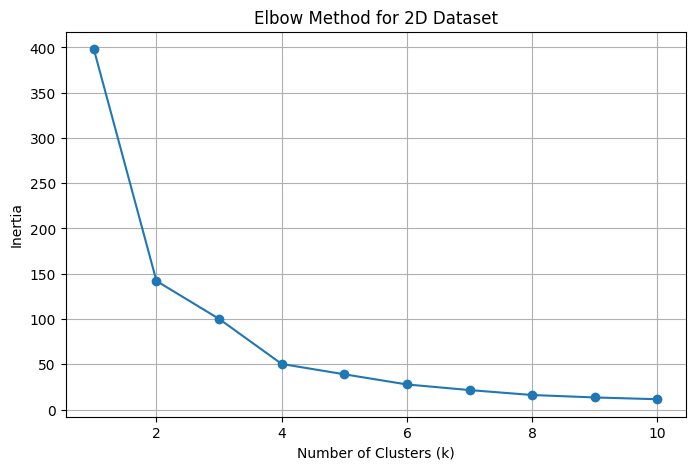

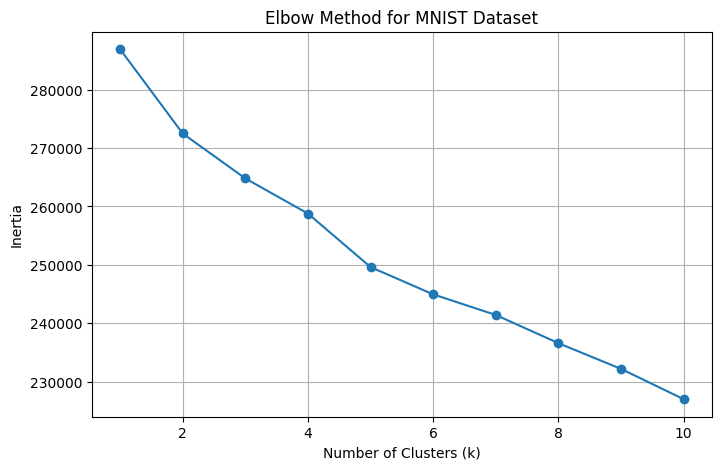

In [ ]:
data_2d_features = data_2d.iloc[:, :2]

scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d_features)

def elbow_method(data, max_k=10):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    return inertias

inertias_2d = elbow_method(data_2d_scaled, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias_2d, marker='o')
plt.title('2D Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

mnist_features = mnist.iloc[:, 1:]

mnist_scaled = scaler.fit_transform(mnist_features)

inertias_mnist = elbow_method(mnist_scaled, max_k=10)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias_mnist, marker='o')
plt.title('MNIST Dataset')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

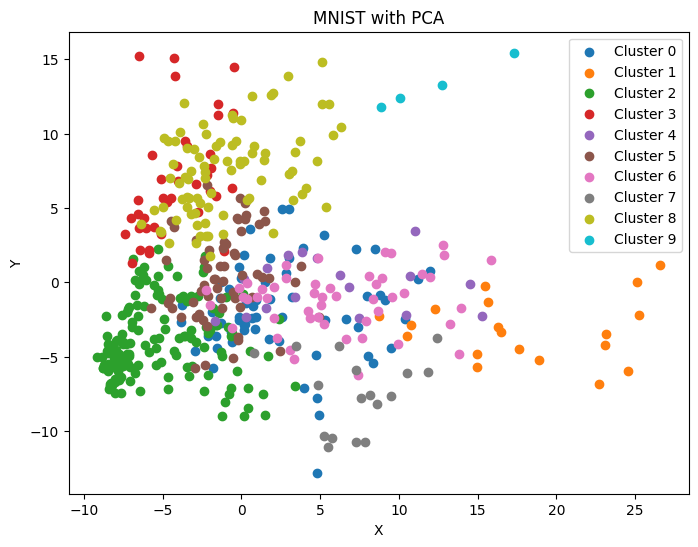

In [ ]:
mnist_features = mnist.iloc[:, 1:]

mnist_scaled = scaler.fit_transform(mnist_features)

top_k = 10
kmeans_mnist = KMeans(n_clusters=top_k, random_state=42)
mnist['Cluster'] = kmeans_mnist.fit_predict(mnist_scaled)

pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_scaled)

mnist_pca_df = pd.DataFrame(mnist_pca, columns=['PCA1', 'PCA2'])
mnist_pca_df['Cluster'] = mnist['Cluster']

plt.figure(figsize=(8, 6))
for cluster in range(top_k):
    plt.scatter(
        mnist_pca_df[mnist_pca_df['Cluster'] == cluster]['PCA1'],
        mnist_pca_df[mnist_pca_df['Cluster'] == cluster]['PCA2'],
        label=f'Cluster {cluster}'
    )
plt.title('MNIST with PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()